# PCA using Python (scikit-learn)
Galarnyk, M. (2020, May 01). PCA using Python (scikit-learn). Retrieved June 05, 2020, from https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

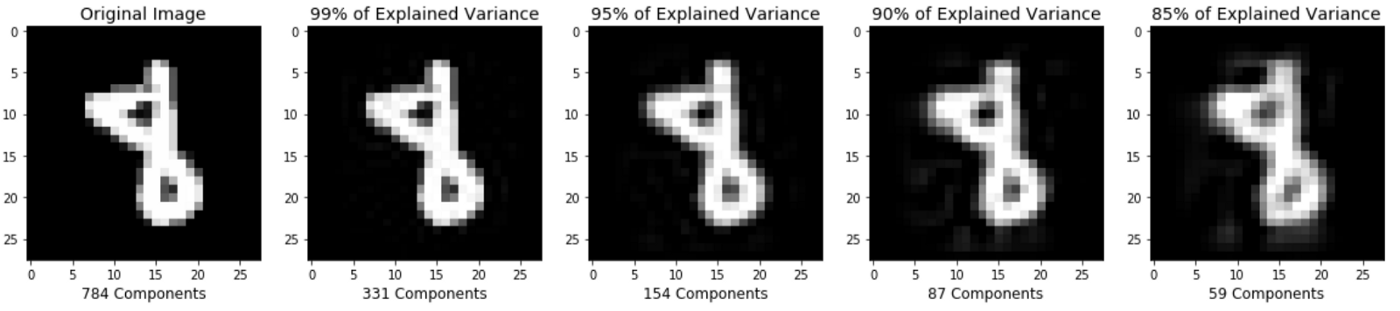

One of the things learned was that you can speed up the fitting of a machine learning algorithm by changing the optimization algorithm.
Another way is using PCA analysis.PCA is able to represent the data in lower dimensions without losing much variance in the data. Hence PCA can be simply used to visualize the data in lower dimensions.

1st: Let us visualize the IRIS dataset after applying PCA.
2nd: Use PCA to speed up logistic regression on MNIST digits dataset

## PCA for Data Visualization
Iris dataset from scikit-learn is 4 dimension, let us use PCA to visualize the 4D data into 3/2 dimesions and plot to understand the data better

### Loading Iris Dataset

In [13]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

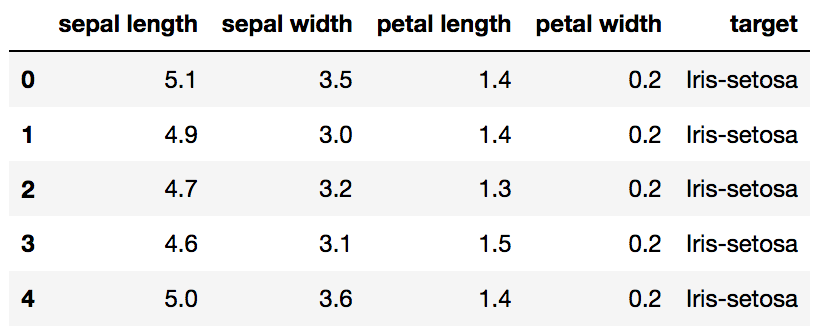
Orginal Pandas Dataframe (features + target)

### Standardize the Data

PCA is effected by scale so you need to scale the features in your data before applying PCA. Use StandardScaler to help you standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms.

#### From scikit-learn
While many algorithms (such as SVM, K-nearest neighbors, and logistic regression) require features to be normalized, intuitively we can think of Principle Component Analysis (PCA) as being a prime example of when normalization is important. 

In PCA we are interested in the components that maximize the variance. If one component (e.g. human height) varies less than another (e.g. weight) because of their respective scales (meters vs. kilos), PCA might determine that the direction of maximal variance more closely corresponds with the ‘weight’ axis, if those features are not scaled. As a change in height of one meter can be considered much more important than the change in weight of one kilogram, this is clearly incorrect.

To illustrate this, PCA is performed comparing the use of data with StandardScaler applied, to unscaled data. The results are visualized and a clear difference noted. The 1st principal component in the unscaled set can be seen. It can be seen that feature #13 dominates the direction, being a whole two orders of magnitude above the other features. This is contrasted when observing the principal component for the scaled version of the data. In the scaled version, the orders of magnitude are roughly the same across all the features.

The dataset used is the Wine Dataset available at UCI. This dataset has continuous features that are heterogeneous in scale due to differing properties that they measure (i.e alcohol content, and malic acid).

The transformed data is then used to train a naive Bayes classifier, and a clear difference in prediction accuracies is observed wherein the dataset which is scaled before PCA vastly outperforms the unscaled version.

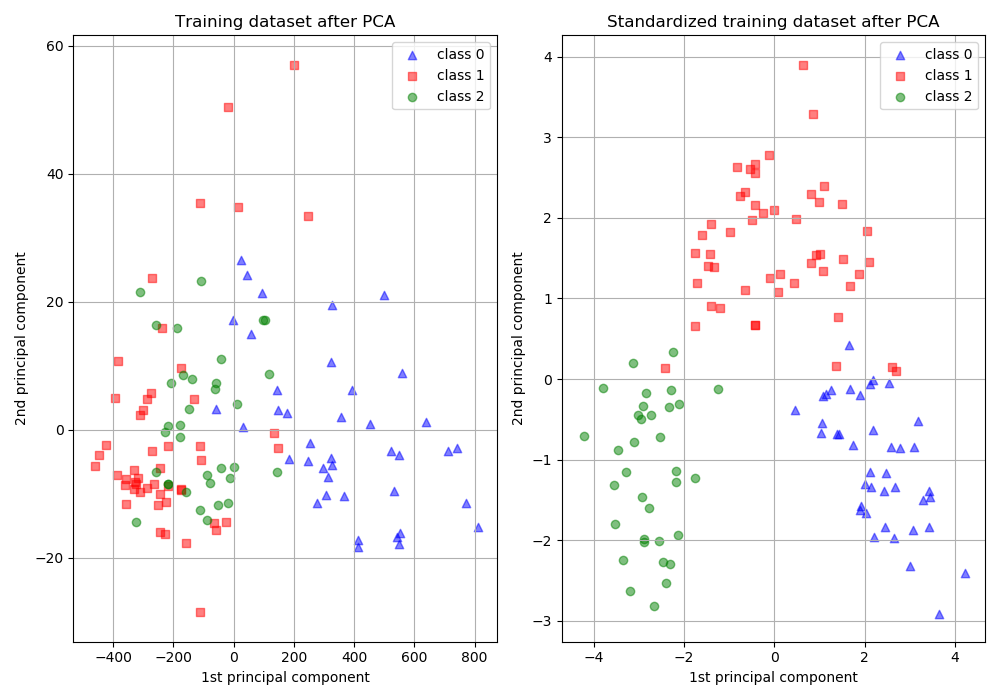

In [42]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']

# Separating out the features
x = df.loc[:, features].values

# Separating out the target
y = df.loc[:,['target']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

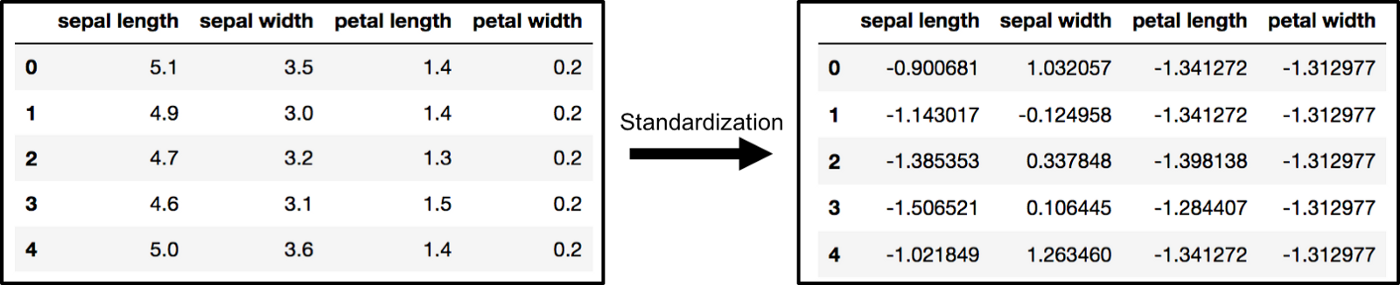

### PCA Projection to 2D (PCA1 and 2)
The original data has 4 columns (sepal length, sepal width, petal length, and petal width). We are going to represent the samples instead onto PCA1 and 2, two main dimensions that points in the directions of the most variation

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

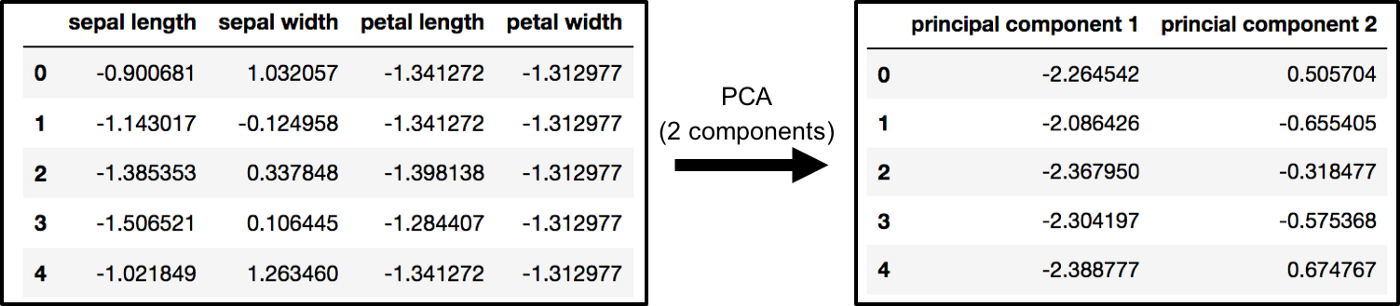

Now, we are concatenating DataFrame along axis = 1. finalDf is the final DataFrame before plotting the data.

In [4]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

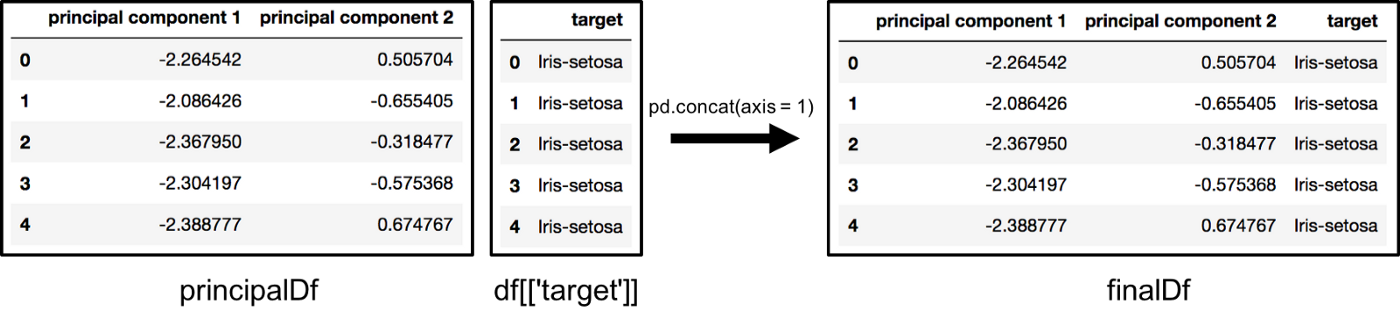

### Visualize 2D Projection
This section is just plotting 2 dimensional data. Notice on the graph below that the classes seem well separated from each other.


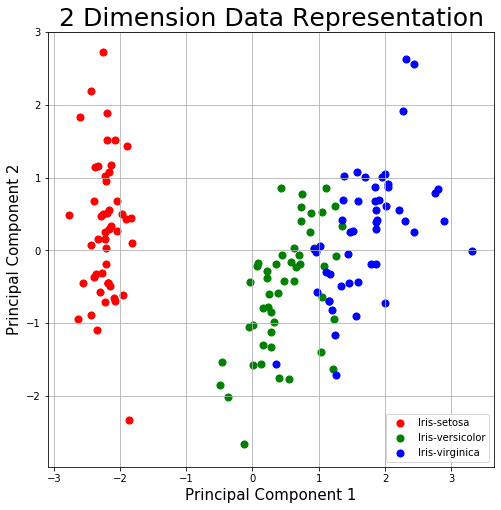

In [9]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Dimension Data Representation', fontsize = 25)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### Explained Variance
The explained variance tells you how much information (variance) can be attributed to each of the principal components. This is important as while you can convert 4 dimensional space to 2 dimensional space, you lose some of the variance (information) when you do this.

In [12]:
pca.explained_variance_ratio_
#PCA1 %variance captured, PCA2 %variance captured

array([0.72770452, 0.23030523])

### What are the limitations of PCA? (SEE SVD/PCA)
- PCA is not scale invariant. check: we need to scale our data first.
- The directions with largest variance are assumed to be of the most interest
- Only considers orthogonal transformations (rotations) of the original variables
- PCA is only based on the mean vector and covariance matrix. Some distributions (multivariate normal) are characterized by this, but some are not.
- If the variables are correlated, PCA can achieve dimension reduction. If not, PCA just orders them according to their variances.

## PCA to Speed-up Machine Learning Algorithms
The MNIST database of handwritten digits has 784 feature columns (784 dimensions), a training set of 60,000 examples, and a test set of 10,000 examples.

### Download and Load the Data
You can also add a data_home parameter to fetch_mldata to change where you download the data.

The images that you downloaded are contained in mnist.data and has a shape of (70000, 784) meaning there are 70,000 images with 784 dimensions (784 features).

The labels (the integers 0–9) are contained in mnist.target. The features are 784 dimensional (28 x 28 images) and the labels are simply numbers from 0–9.

In [53]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

print(mnist.data.shape)
print(mnist.target.shape)

(70000, 784)
(70000,)


### Split Data into Training and Test Sets
Typically the train test split is 80% training and 20% test. In this case, I chose 6/7th of the data to be training and 1/7th of the data to be in the test set.

In [54]:
from sklearn.model_selection import train_test_split
# test_size: what proportion of original data is used for test set
train_img, test_img, train_lbl, test_lbl = train_test_split(
    mnist.data, mnist.target, test_size=1/7.0, random_state=0)

print(train_img.shape)
print(train_lbl.shape)
print(test_img.shape)
print(test_lbl.shape)


(60000, 784)
(60000,)
(10000, 784)
(10000,)


### Standardizing as usual

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(train_img)

# Apply transform to both the training set and the test set.
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

### Apply PCA before our ML algorithm like Linear regression
Fit PCA on training set. Note: you are fitting PCA on the training set only.

In [57]:
from sklearn.decomposition import PCA
# Make an instance of the Model, PCA and chooses the min no. of PC to keep such that 95% of variance captured
pca = PCA(.95)

In [59]:
# Fitting PCA using the training set only
pca.fit(train_img)


PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [61]:
# No. of PCs chosen to be kept
pca.n_components_


327

In [62]:
# Project all data including test set ontot the PCA
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

### Import our Machine learning model
In sklearn, all machine learning models are implemented as Python classes

In [63]:
from sklearn.linear_model import LogisticRegression
# make instance of model class
# all parameters not specified are set to their defaults
# default solver is incredibly slow thats why we change it
# solver = 'lbfgs'
logisticRegr = LogisticRegression(solver = 'lbfgs')

Training the model on the data, storing the information learned from the data

Model is learning the relationship between x (digits) and y (labels)

In [64]:
logisticRegr.fit(train_img, train_lbl)


C:\Users\samue\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Predict the labels of new data (new images)
Uses the information the model learned during the model training process.

The code below predicts for one observation

In [65]:
# Predict for One Observation (image)
logisticRegr.predict(test_img[0].reshape(1,-1))

array(['0'], dtype=object)

The code below predicts for multiple observations at once


In [66]:
# Predict for Mutliple Observation (images) at Once
logisticRegr.predict(test_img[0:10])

array(['0', '4', '1', '2', '4', '7', '7', '1', '1', '7'], dtype=object)

### Measuring Model Performance
Accuracy (fraction of correct predictions): correct predictions / total number of data points

Basically, how the model performs on test set that we have the actual labels for


In [67]:
score = logisticRegr.score(test_img, test_lbl)
print(score)

0.9201


## Timing of Fitting Logistic Regression after PCA
The table below shows how long it took to fit logistic regression on after using PCA (retaining different amounts of variance each time).

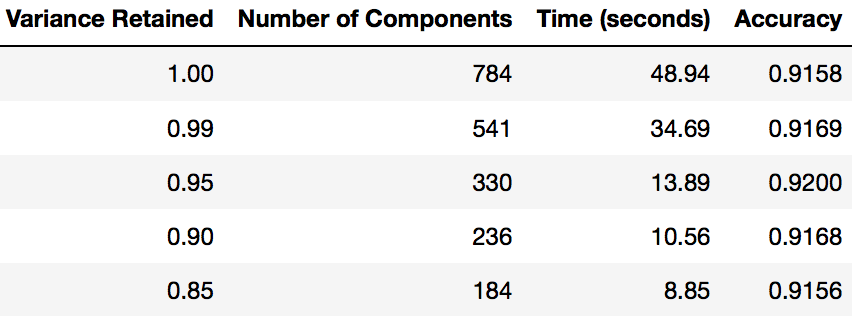